In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates

 Reflect Tables into SQLAlchemy ORM

In [2]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, cast, Date, distinct, desc

In [3]:
 engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
 # Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

In [11]:
#Exploratory Climate Analysis
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

In [12]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
engine.execute('select * from measurement').fetchall()
session.query(func.count(Measurement.date)).all()
lastDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastDate = str(lastDate).strip('(,)')
year_ago = pd.to_datetime(lastDate) - dt.timedelta(days=365)
oneYear = dt.date(year_ago.year,year_ago.month, year_ago.day)
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > oneYear).all()
for row in results:
    print(row)
ptps = list(np.ravel(results))


('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.0)
('

('2017-01-24', 0.13)
('2017-01-25', 0.79)
('2017-01-26', 0.0)
('2017-01-27', 0.03)
('2017-01-28', 0.0)
('2017-01-29', 0.26)
('2017-01-30', 0.0)
('2017-01-31', 0.0)
('2017-02-01', 0.0)
('2017-02-02', 0.0)
('2017-02-03', 0.0)
('2017-02-04', 0.0)
('2017-02-05', 0.0)
('2017-02-06', 0.18)
('2017-02-07', 1.32)
('2017-02-08', 0.0)
('2017-02-09', 0.0)
('2017-02-10', 0.0)
('2017-02-11', 1.73)
('2017-02-12', 2.98)
('2017-02-13', 0.01)
('2017-02-14', 0.0)
('2017-02-15', 0.01)
('2017-02-16', 0.73)
('2017-02-17', 0.13)
('2017-02-18', 0.0)
('2017-02-19', 0.09)
('2017-02-20', 0.0)
('2017-02-21', 0.0)
('2017-02-22', 0.06)
('2017-02-23', 0.0)
('2017-02-24', 0.0)
('2017-02-25', 0.0)
('2017-02-26', 0.0)
('2017-02-27', 0.0)
('2017-02-28', 0.04)
('2017-03-01', 2.12)
('2017-03-02', 1.88)
('2017-03-03', 0.27)
('2017-03-04', 0.0)
('2017-03-05', 0.41)
('2017-03-06', 0.03)
('2017-03-07', 0.0)
('2017-03-08', 0.0)
('2017-03-09', 0.65)
('2017-03-10', 0.03)
('2017-03-11', 0.01)
('2017-03-12', 0.0)
('2017-03-13', 0.

In [15]:
engine.execute('select * from station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [16]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [17]:
df = pd.DataFrame(results, columns=['date', 'prcp'])
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d',errors="coerce")
df['prcp'] = df['prcp'].fillna(0)
df.sort_values(by=['date'])
df.head(10)

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
5,2016-08-29,0.00
6,2016-08-30,0.00
7,2016-08-31,0.13
8,2016-09-01,0.00
9,2016-09-02,0.00


In [18]:
df.set_index('date', inplace=True)

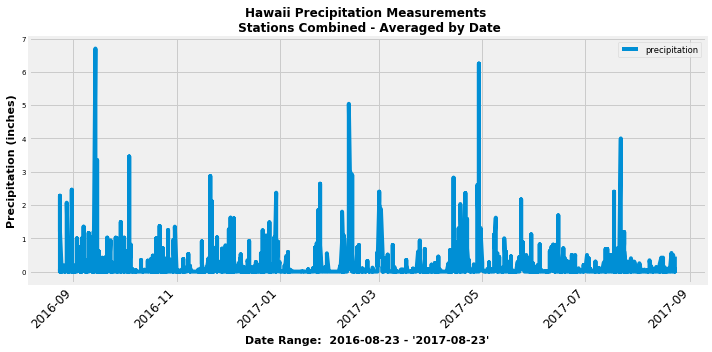

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(use_index=True, y='prcp', figsize=(10,5))
plt.title("Hawaii Precipitation Measurements \n Stations Combined - Averaged by Date", fontweight='bold',size=12)
plt.xlabel(f"Date Range:  {oneYear} - {lastDate}", fontweight='bold', size=11)
plt.ylabel("Precipitation (inches)", fontweight='bold', size=11)
plt.yticks(size=7)
plt.xticks(rotation=45, size=12)
plt.legend(["precipitation"],loc='best', fontsize='small')
plt.tight_layout()
plt.savefig('precipitation_amounts.png')
plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [35]:
# Design a query to show how many stations are available in this dataset?
count = engine.execute('select COUNT(station) from station').fetchall()
count[0][0]

9

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
results = session.query(Measurement.station, func.count().label('count')).group_by(Measurement.station).order_by(desc('count')).all()
for row in results:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
busyStation = results[0][0]
station_max =  session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == busyStation).all()
print(station_max)

[(54.0, 85.0, 71.66378066378067)]


In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_results = session.query(Measurement.tobs).\
    filter(Measurement.date > oneYear).filter(Measurement.station == busyStation).order_by(Measurement.tobs).all()
for row in tobs_results:
    print(row)

(59.0,)
(59.0,)
(59.0,)
(60.0,)
(60.0,)
(61.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(63.0,)
(63.0,)
(63.0,)
(63.0,)
(64.0,)
(64.0,)
(64.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(66.0,)
(66.0,)
(66.0,)
(66.0,)
(66.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)


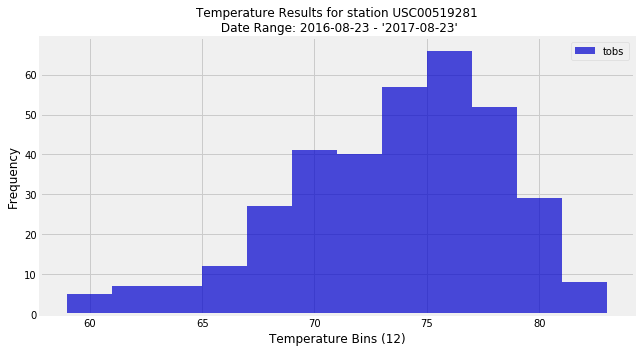

In [25]:
df = pd.DataFrame(tobs_results, columns=['tobs'])
hist = df.hist(bins=12, color="mediumblue", alpha=.7,figsize=(9,5))
plt.title(f"Temperature Results for station {busyStation}\n Date Range: \
{oneYear} - {lastDate}",fontsize=12)
plt.xlabel('Temperature Bins (12)', fontsize=12)
plt.ylabel("Frequency", fontsize=12)
labels = ['tobs']
plt.legend(labels)
plt.tight_layout()
plt.savefig('temperature_busy_station.png')

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = '2016-07-30'
end_date = '2016-08-15'
vacation = calc_temps(start_date, end_date)
print(vacation)

[(71.0, 78.02803738317758, 83.0)]


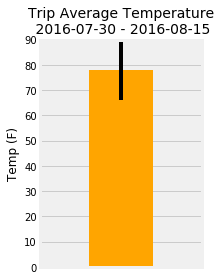

In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.subplots(figsize=(3,4))
plt.xlim(0, 2)
plt.ylim([0,90])
plt.bar(1, vacation[0][1], color = 'orange', yerr = vacation[0][2] - vacation[0][0], tick_label="", align='center')
plt.title(f"Trip Average Temperature\n {start_date} - {end_date}", fontsize=14)
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.savefig('trip_average_temperature.png')


In [29]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
results = session.query(Station.station,
                  func.sum(Measurement.prcp),
                  Station.name,
                  Station.elevation,                                    
                  Station.latitude,
                  Station.longitude)\
                    .outerjoin(Measurement, Station.station == Measurement.station).group_by(Station.station)\
                    .filter(Measurement.date >= start_date).filter(Measurement.date <= end_date)\
                    .order_by(func.sum(Measurement.prcp).desc()).all()

for row in results:
    print(row)

('USC00516128', 11.109999999999998, 'MANOA LYON ARBO 785.2, HI US', 152.4, 21.3331, -157.8025)
('USC00519281', 6.889999999999998, 'WAIHEE 837.5, HI US', 32.9, 21.45167, -157.84888999999998)
('USC00513117', 4.43, 'KANEOHE 838.1, HI US', 14.6, 21.4234, -157.8015)
('USC00519523', 2.19, 'WAIMANALO EXPERIMENTAL FARM, HI US', 19.5, 21.33556, -157.71139)
('USC00514830', 1.1600000000000001, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 7.0, 21.5213, -157.8374)
('USC00519397', 0.65, 'WAIKIKI 717.2, HI US', 3.0, 21.2716, -157.8168)
('USC00517948', 0.18, 'PEARL CITY, HI US', 11.9, 21.3934, -157.9751)
